### Film Script Analysis  -- Case Study 12 -- John Q.




-----20 Movies Script Visualizations will be done------This could be done for the 1000+ movie script I segmented--- I just randomly chose 20 movie scripts from the segmented movies....



#### The aim of this project is to provide detailed insights into different movies analyzed focusing on the characters, their dialogues, scene locations, emotional and sentiment analysis of the whole movie and the individual characters, character's interaction with one another and finally gender distribution in the each movie analyzed.


### To execute this project, the following objectives were done:


1. Web scraping of the movie scripts (Over 1000+ movies were scraped from imsdb website)


2. Movies segmentation into Scenes --> **Scene Location, Scene Action/Description, Scene Dialogues, Scene Characters (All the movies scraped were segmented except those that do not follow the "Screenplay format i.e. INT / EXT)"**


3. Character extraction and appearances plot ---> Here, characters were plotted based on how many times they appeared and spoke in each scene and across the movie.


4. Character Interaction Mapping --> We mapped out the connection between all the characters in the movie and also the interaction between the Top 10 characters in the movie.


5. Here, we looked at the **Most mentioned character based on the Scene dialogues and also the characters each character mention the most in their conversation.**


6. Similar to Number 5., Here looked at who a specific character talks with the most in the Movie.


7. **Emotional and Sentiment Analysis across the whole movie and for each individual character**, However for this project we limited it to only the Top 10 characters. ---> This gives us the character's emotion when he/she appears in the movie.


8. Additional Scene Informations --> Exact Scene Locations, Scenes with dialogs and no dialogs, Scenes that occurred during the Day or in the Night, Scenes location based on Outdoor or Indoor appearances.


9. Gender Distribution in the movie


***(python Code) Modules for this project: imsbd_moviescript_scraper_AND_Scene_Segmentation.py,   dialogue_appearance.py, characters_extract.py, xter_interaction.py,   characters_mt.py,   emotions.py,  movie_info.py,   gend_distribution_plot.py***




Tools: Python libraries

In [1]:
#Import all the necessary python modules needed for this analysis

from characters_extract import extract_characters
from dialogue_appearance import scene_dialogues
from xter_interaction import interaction
from emotions import emotions_sentiments
from characters_mt import character_mentions
from gend_distribution_plot import gender
from movie_info import scene_info_plots

In [2]:
import glob
import random
import secrets
import re

import cufflinks as cf
import networkx as net
import itertools
# plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

### 1. Load in the Segmented Movie scripts stored in .pkl format

In [3]:
films = []
for f in glob.glob('Films/*'):
    film_name = re.sub(r'.pkl|Films\\', '', f)
    films.append(film_name)

In [4]:
#Number of Films we segmented into scenes, scene_actions, characters, and characters dialogue
print('Number of films available for Analysis:  ', len(films), ' Movies')

Number of films available for Analysis:   1037  Movies


In [5]:
#Random 10 films from the 1000 films scraped from the internet
films_list = random.sample(films, 10)

In [11]:
#Randomly select film to analyze
film = secrets.choice(films_list)
print(film)

John-Q


In [12]:
##load the scenes, dialogues, characters into dataframe

df_film = pd.read_pickle('Films/' + film + '.pkl')
df_film_dialogue = pd.read_pickle('Dialogues/' + film + '.pkl')
df_film_characters = pd.read_pickle('Characters/' + film + '.pkl')

In [14]:
#Randomly generate 10 scenes from the movie script
df_film.sample(10)

,Scene_Names,Scene_action,Scene_Characters,Scene_Dialogue,Contents
84,INT. HOSPITAL ENGINE AND POWER ROOM LATE AFTE...,Pitoniak climbs along the narrow catwalk until...,None,None,Pitoniak climbs along the narrow catwalk unti...
138,INT. MONTANA HOSPITAL OPERATING ROOM NIGHT,The stretcher is rushed into the O.R. and the ...,None,None,The stretcher is rushed into the O.R. and the...
130,EXT. HOPE MEMORIAL HOSPITAL MAGIC HOUR,The front doors burst open and Mike's bed is r...,"[COPS, DENISE]","[Coming through. Let's go. Move it back, folks...",The front doors burst open and Mike's bed is ...
6,INT. ARCHIBALD HOUSE KITCHEN MORNING,ON a hand circling wantads in red ink. J.Q. si...,"[DENISE, DENISE, DENISE, DENISE, DENISE, MIKE,...","[Okay. J.Q. I did., John, that was two months ...",ON a hand circling wantads in red ink. J.Q. ...
21,INT. EMERGENCY ROOM DAY,It's standing room only. Bodies everywhere. Do...,"[MAGUIRE, MAGUIRE]",[What happened? J.Q. I don't know. He had a ba...,It's standing room only. Bodies everywhere. D...
62,INT. EMERGENCY ROOM TREATMENT AREA DAY,Mitch is snooping around one of the treatment ...,"[SECURITY GUARD, MITCH, SECURITY GUARD, MITCH,...","[What are you up to?, Never mind me. You are w...",Mitch is snooping around one of the treatment...
148,INT. J.Q.'S TRAUMA ROOM NIGHT,J.Q. readies himself before laying back on the...,[DR. TURNER],[John. Stop. I changed my mind. I won't do thi...,J.Q. readies himself before laying back on th...
157,EXT. HOPE MEMORIAL HOSPITAL E.R. ENTRANCE NIGHT,BLAM The sound is revealed. Not a bullet. It's...,[DENISE],[John It's a miracle They found a heart It's a...,BLAM The sound is revealed. Not a bullet. It'...
110,INT. DUCT SYSTEM LATE AFTERNOON,The sniper cues his mic.,[SNIPER],[On your call. ],The sniper cues his mic. SNIPER On your call.
154,INT. J.Q.'S TRAUMA ROOM NIGHT,ON J.Q.'s GUN Moves closer to the temple til i...,None,None,ON J.Q.'s GUN Moves closer to the temple til...


In [13]:
#check how many scenes the movie script has
df_film.shape

(170, 5)

In [15]:
#Randomly select characters and their corresponding dialogues
df_film_dialogue.sample(10)

,characters,Character_dialogue
646,DENISE,"John, honey? Pick up. J.Q. hears Denise's voic..."
223,LAMPLEY,"This is big, isn't it, Frank? I can feel it. C..."
342,GRIMES,I do for you. You do for me. Show some good fa...
277,MITCH,"Mercedes 500. J.Q. A Benz, huh?"
638,GRIMES,You really put the kid on the list?
328,MITCH,"Is that how you paid for that Armani suit, Doc..."
505,MIKE,Uhhuh. How are you? J.Q. Me? I am fine. Don't ...
493,DENISE,They have done everything they can but he keep...
436,MONROE,"I swear to God, I will kill you. Boys. Boys."
332,STEVE,"I have got to be honest, if my kid was dying a..."


### 2. Character appearance plots

In [18]:
ext = extract_characters(df_film, df_film_dialogue, df_film_characters, film)

In [19]:
movie_characters = ext.extract_character_plot()

In [20]:
dia = scene_dialogues(df_film, film)

In [21]:
df_xter_app = dia.character_appearances(movie_characters)

### Lets check the appearance of the top 3 characters  across the Movie

In [22]:
#Movie characters....some names may not be characters....
print('Movie Characters:  \n', movie_characters)

Movie Characters:  
 ['GRIMES', 'DENISE', 'DR. TURNER', 'MIKE', 'MITCH', 'MONROE', 'PAYNE', 'LAMPLEY', 'MAGUIRE', 'MOODY', 'JIMMY', 'DR. KLEIN', 'LESTER', 'JULIE', 'SECURITY GUARD', 'REGGIE', 'STEVE', 'DEBBY', 'GINA', 'ADMITTING NURSE', 'ROSA', 'STATE REP', 'COUNTY EMPLOYEE', 'MEDICAID OFFICER', 'MIRIAM', 'REPORTER', 'UNOS OFFICIAL', 'JUDGE', 'PERSONNEL MANAGER', 'PASTOR', 'PARAMEDIC', 'NURSE', 'UMPIRE', 'FIRST BASE UMP', "SHELBY'S WIFE", 'SNIPER', 'SNIPER POV', 'JURY FORMAN']


In [23]:
df_1st_count, df_1st_dialogue = dia.xter_count_perscene(movie_characters[0])

In [24]:
dia.scene_dialogue_plot(df_1st_count)

In [25]:
df_2nd_count, df_2nd_dialogue = dia.xter_count_perscene(movie_characters[1])
dia.scene_dialogue_plot(df_2nd_count)

In [26]:
df_third_count, df_third_dialogue = dia.xter_count_perscene(movie_characters[2])
dia.scene_dialogue_plot(df_third_count)

In [27]:
df_2_count, df_2_dialogue = dia.xter_count_perscene(movie_characters[:2])
dia.scene_dialogue_plot(df_2_count)

In [28]:
df_3_count, df_3_dialogue = dia.xter_count_perscene(movie_characters[1:3])
dia.scene_dialogue_plot(df_3_count)

### 3. Character Interaction Mapping

In [29]:
interact = interaction(df_film, film)

In [30]:
graph_list = interact.character_interaction()

#### Note the Net.MultiGraph code below will throw an error, BUT this does not stop it from displaying the Character Network Multigraph figure, 

#### To run it, remove the hashtags i.e. comment it out

In [36]:
# G = net.MultiGraph()
# for scene in graph_list:
#     nodes = list(itertools.combinations(scene,2))
#     for pair in nodes:
#         G.add_edges_from([pair])
# page_ranked_nodes = net.pagerank_numpy(G,0.95)
# net.enumerate_all_cliques(G)
# between_nodes = net.betweenness_centrality(G, normalized=True, endpoints=True)

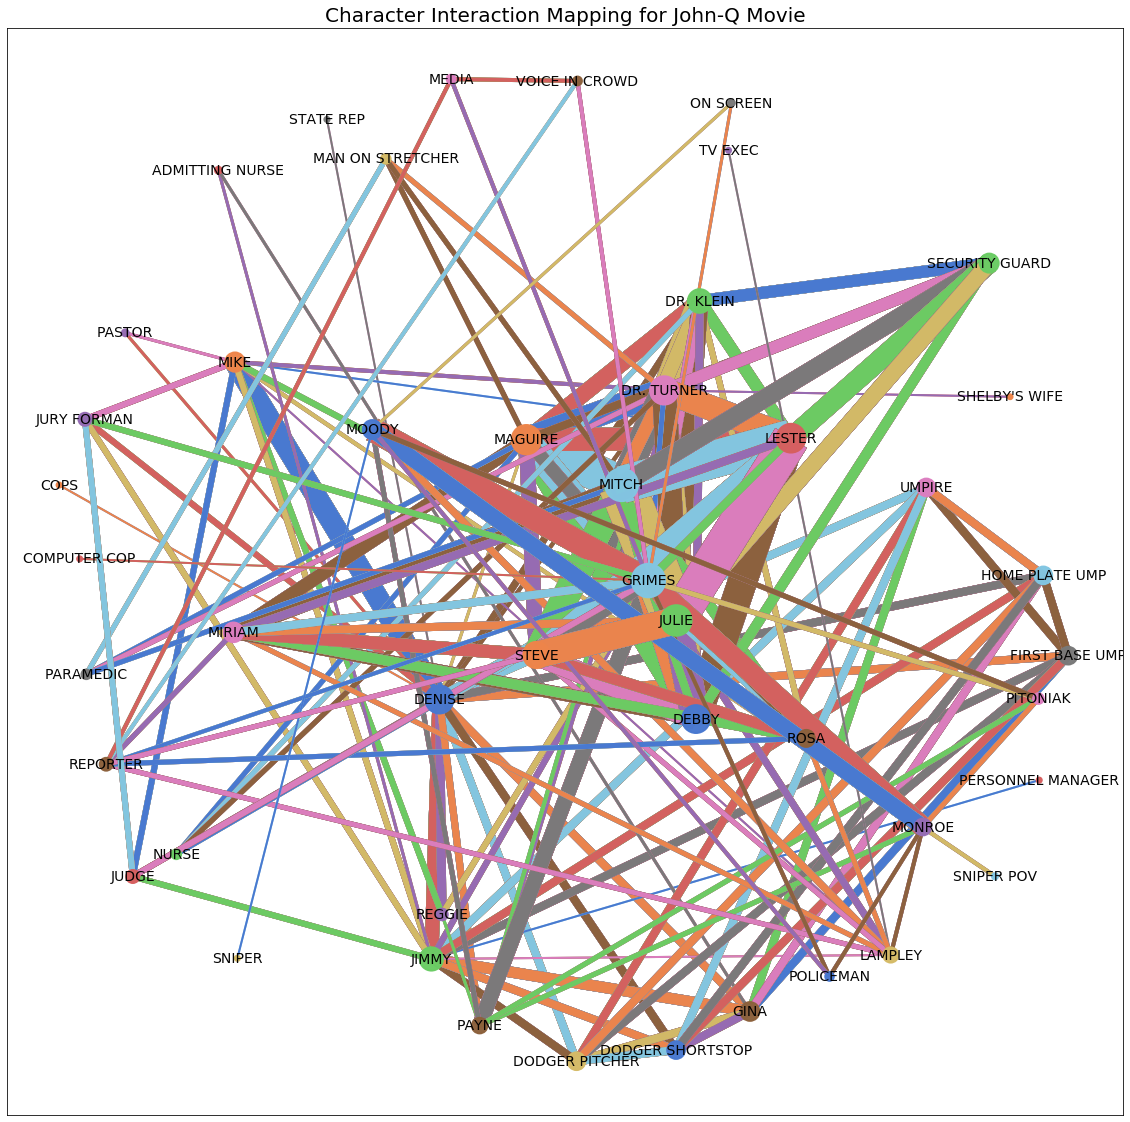

In [32]:
interact.character_interaction_plot(G, page_ranked_nodes)

## Let break it down to the Top 10 Characters

In [33]:
#Remember to Re-run the above multigraph code aafter running this code line
graph_list = interact.top10_character_interaction(movie_characters[:10])

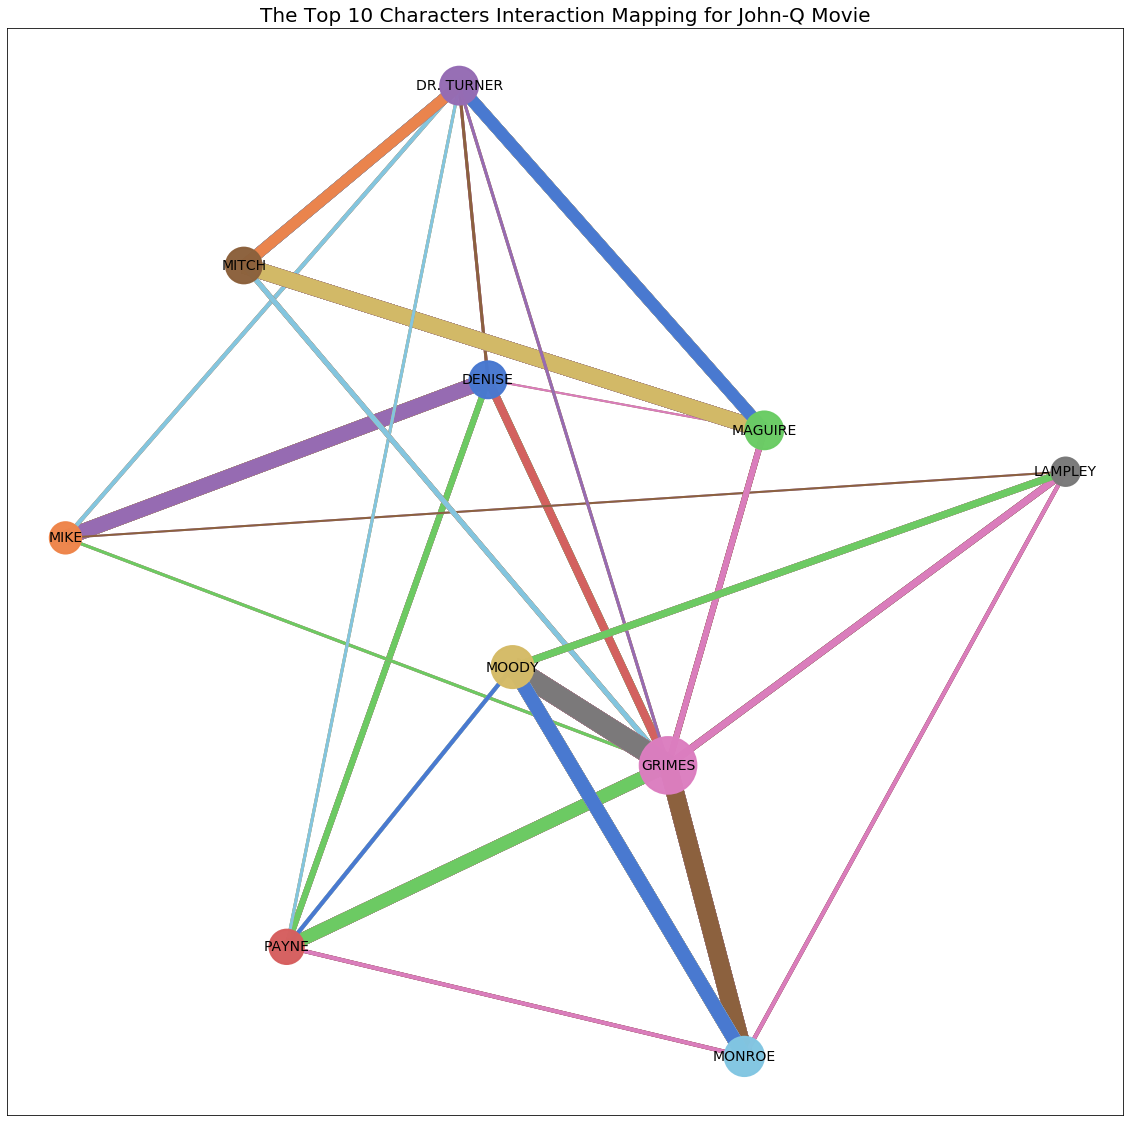

In [37]:
interact.character_interaction_plot(G, page_ranked_nodes)

### 4. Characters mentioned the most in Scene Dialogues (Most-talked about characters in the movie.......) and who each character mention the most in their specific dialogue

In [38]:
xtr = character_mentions(df_film, movie_characters, film)

In [39]:
xter_mentions = xtr.most_mentioned()

### Lets the check the appearance of the 5 most mentioned characters in the Movie

In [40]:
xtr.top_xters_mentions(xter_mentions, 5)

### Lets check who specific characters mention the most in their dialogues in the movie

In [41]:
print(movie_characters)

['GRIMES', 'DENISE', 'DR. TURNER', 'MIKE', 'MITCH', 'MONROE', 'PAYNE', 'LAMPLEY', 'MAGUIRE', 'MOODY', 'JIMMY', 'DR. KLEIN', 'LESTER', 'JULIE', 'SECURITY GUARD', 'REGGIE', 'STEVE', 'DEBBY', 'GINA', 'ADMITTING NURSE', 'ROSA', 'STATE REP', 'COUNTY EMPLOYEE', 'MEDICAID OFFICER', 'MIRIAM', 'REPORTER', 'UNOS OFFICIAL', 'JUDGE', 'PERSONNEL MANAGER', 'PASTOR', 'PARAMEDIC', 'NURSE', 'UMPIRE', 'FIRST BASE UMP', "SHELBY'S WIFE", 'SNIPER', 'SNIPER POV', 'JURY FORMAN']


In [42]:
df_dn = xtr.talk_about_xters(df_film_dialogue, 'DENISE')

In [43]:
df_gr = xtr.talk_about_xters(df_film_dialogue, 'GRIMES')

In [44]:
df_mike = xtr.talk_about_xters(df_film_dialogue, 'MIKE')

### Lets check who specific characters talk with the most in the movie

In [45]:
df_gr = xtr.most_talked_with('GRIMES')

In [46]:
df_denise = xtr.most_talked_with(movie_characters[1])

### We could continue to check this for every character but I will pause here.... 

### 5. Emotional Arcs and Sentiment Analysis across the Movie and for each characters

In [47]:
etn = emotions_sentiments(df_film, film)

In [49]:
#df_film_sentiment = etn.film_sentiment('#17becf')

In [50]:
df_film_emotion = etn.film_emotional_arc()

### Lets check the emotional content for the Top 10 characters in the Movie

In [51]:
df_top10_emotions =  etn.emotional_content_plot(df_film_dialogue, movie_characters, 11)

### Lets check emotional arcs for specific characters

###  Emotions at scenes where the character is not present is set to ZERO

In [52]:
df_gr_emotions = etn.emotional_arc_xter_plot(df_film_emotion, 'GRIMES')

In [53]:
df_den_emotions = etn.emotional_arc_xter_plot(df_film_emotion, 'DENISE')

In [54]:
df_turner_emotions = etn.emotional_arc_xter_plot(df_film_emotion, 'DR. TURNER')

### As usual, this can be done for all characters in the movie, but we will pause here....

### 4. Movie additional information: Exact Scene location, Indoor/Outdoor Scenes percent, Time of Day occurences in the movie....

In [55]:
info = scene_info_plots(df_film, film)

In [56]:
info.extract_scene_locations()

In [57]:
info.pie_plots()

### 5. Gender Distribution in the Movie

In [58]:
gd = gender(movie_characters, film)

In [59]:
df_gender = gd.gender_types(px.colors.sequential.Viridis)

[nltk_data] Downloading package names to C:\Users\Adeboye
[nltk_data]     Adeniyi\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


### This should give a screen writer a broad overview of the underlying insights that could be discovered from an existing screen play or movie script.



### Thanks for visualizing this extensive film script analysis...



### Remember all codes for this analysis are already in python modules....